In [62]:
import stlab
import stlabutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

qubit     = '#664277'  # qubit
cavity1   = '#fa476f'  # cavity 1
cavity2   = '#c86464'  # cavity 2
coupling1 = '#68b799'  # coupling between qubit and cavity 1
coupling2 = '#7eb6a1'  # coupling between qubit and cavity 1
drive     = '#68b799'  # single-tone drive strength
driveq    = 'green'    # qubit-friendly drive tone strength
drivec    = 'cyan'     # cavity-friendly drive tone strenth
sbred     = '#c86464'  # P(e0)-P(g1), red sideband transitions
sbblue    = '#6196b3'  # P(e1)-P(g0), blue sideband transitions
hline     = 'gray'     # horizontal domain lines
colormap  = 'gist_heat'   # colormap for color plots

mpl.rcParams['font.size'] = 22
mpl.rcParams['axes.titlesize'] = 22
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['legend.fontsize'] = 17
mpl.rcParams['figure.titlesize'] = 22
mpl.rcParams['lines.linewidth'] = 2

In [63]:
folder = '/home/jovyan/steelelab/measurement_data/newBF/Wouter/Wouter_thesis_resonator_and_qubit_basic/H_qubit_fit_-30dBm_#fpump_S21/'
filename = 'B132_2019_12_27_06.41.12_LT142W4_5D_c_40dB-prove_40dB'
filepath = folder + filename + '.dat'
mydata = stlabutils.readdata.readdat(filepath)

['Frequency (Hz)', 'CH2_S21_S1re ()', 'CH2_S21_S1im ()', 'CH2_S21_S1dB (dB)', 'CH2_S21_S1Ph (rad)', 'power (dBm)']


In [64]:
block = mydata[0]
block['S21'] = block['CH2_S21_S1re ()']**2 + block['CH2_S21_S1im ()']**2

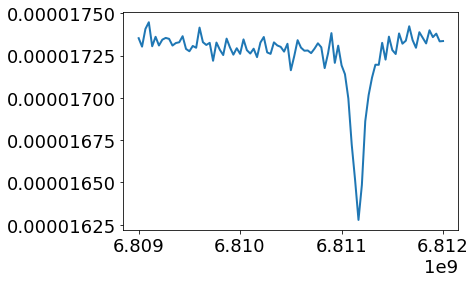

In [65]:
plt.plot(block['Frequency (Hz)'],block['CH2_S21_S1im ()'])
plt.show()
plt.close()

In [66]:
block.keys()

Index(['Frequency (Hz)', 'CH2_S21_S1re ()', 'CH2_S21_S1im ()',
       'CH2_S21_S1dB (dB)', 'CH2_S21_S1Ph (rad)', 'power (dBm)', 'S21'],
      dtype='object')

In [67]:
from lmfit import Model 
def lorentzian(x, x0, amp,gamma,offset):
    return amp*(0.5*gamma/((x-x0)**2+0.25*gamma**2)/np.pi)+offset

f=block['Frequency (Hz)']
y=block['CH2_S21_S1im ()']

gmodel = Model(lorentzian)
result = gmodel.fit(y,x=f,amp=2e2, gamma=10e+3, x0=6.811e+9,offset=0)

print(result.fit_report())
print(result.best_values)

[[Model]]
    Model(lorentzian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 56
    # data points      = 91
    # variables        = 4
    chi-square         = 2.3034e-13
    reduced chi-square = 2.6476e-15
    Akaike info crit   = -3050.51602
    Bayesian info crit = -3040.47258
[[Variables]]
    x0:      6.8112e+09 +/- 2567.79688 (0.00%) (init = 6.811e+09)
    amp:    -0.21355519 +/- 0.00965183 (4.52%) (init = 200)
    gamma:   129195.275 +/- 7704.40149 (5.96%) (init = 10000)
    offset:  1.7325e-05 +/- 6.1582e-09 (0.04%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, gamma)    = -0.749
    C(amp, offset)   = -0.482
    C(gamma, offset) =  0.351
{'x0': 6811164547.281772, 'amp': -0.2135551859131381, 'gamma': 129195.27538675943, 'offset': 1.732494559345254e-05}


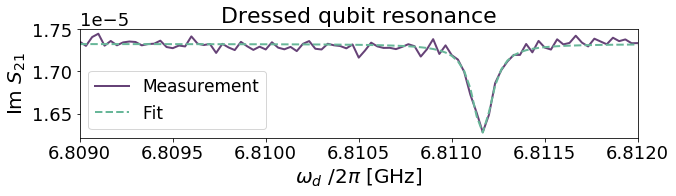

In [76]:
plt.figure(figsize=(10,2))
plt.plot(f*1e-9, y, color=qubit, label='Measurement')
plt.plot(f*1e-9, result.best_fit, '--', color=drive, label='Fit')
plt.xlim([6.809, 6.812])
plt.title('Dressed qubit resonance')
plt.xlabel('$\\omega_d$ $/2\\pi$ [GHz]')
plt.ylabel('Im $S_{{21}}$')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend(loc='lower left')
plt.show()